#  Data Preprocessing & Importing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

## Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:, -1].values

## Checking and filling for missing data 

In [3]:
#temporarily creating a variable to check for missing data
feature_X = pd.DataFrame(X)
feature_Y = pd.DataFrame(y)

# Check for missing values
missing_values_X = feature_X.isnull().sum().sum()
missing_values_Y = feature_Y.isnull().sum().sum()
print(f"Total missing values: {missing_values_X}")
print(f"Total missing values: {missing_values_Y}")

Total missing values: 0
Total missing values: 0


## Encoding categorical variable

### Label Encoder for Gender variable

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

###  One Hot Encoder for Geography

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)

# Removing the features

In [11]:
from scipy.stats import chi2_contingency
for i in range(0,12):
    contingency_table = pd.crosstab(X[:,i], y)
    chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    print("the syntax :", i)
    if p_value < 0.05:
        print("Reject null hypothesis & p_value is :" ,p_value)
    else:
        print("Fail to reject null hypothesis  & p_value is :",p_value)

the syntax : 0
Reject null hypothesis & p_value is : 1.7044531471585912e-66
the syntax : 1
Reject null hypothesis & p_value is : 4.273747023659205e-181
the syntax : 2
Reject null hypothesis & p_value is : 2.0059458282549308e-10
the syntax : 3
Reject null hypothesis & p_value is : 4.2867740034911244e-13
the syntax : 4
Reject null hypothesis & p_value is : 9.362308387850991e-109
the syntax : 5
Reject null hypothesis & p_value is : 0.0
the syntax : 6
Reject null hypothesis & p_value is : 4.091048215137019e-09
the syntax : 7
Reject null hypothesis & p_value is : 2.985505693743467e-40
the syntax : 8
Reject null hypothesis & p_value is : 0.0
the syntax : 9
Reject null hypothesis & p_value is : 0.04823086724376921
the syntax : 10
Reject null hypothesis & p_value is : 4.094743931635039e-136
the syntax : 11
Fail to reject null hypothesis  & p_value is : 0.3573849943115016


In [12]:
# only salary data Fail to reject null hypothesis
print(np.mean(X[:,11]))
print(st.stdev(X[:,11]))
# THIS IS SAME IN TEST SET SO WE CAN REMOVE ""Salary"" 

117716.4972340008
45461.85399884175


In [13]:
# romoving the salary
X = X[:,0:11]
print(X)

[[1.0 0.0 0.0 ... 1.0 1.0 0.0]
 [0.0 1.0 0.0 ... 1.0 1.0 0.0]
 [0.0 0.0 1.0 ... 2.0 1.0 0.0]
 ...
 [1.0 0.0 0.0 ... 1.0 1.0 0.0]
 [1.0 0.0 0.0 ... 2.0 1.0 0.0]
 [1.0 0.0 0.0 ... 2.0 1.0 1.0]]


# Spliting Train and Test data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.06)

# MACHINE LEARNING

## Importing scaler & machine models

In [8]:
# import Scaling Model
from sklearn.preprocessing import StandardScaler,MaxAbsScaler ,Normalizer,RobustScaler,QuantileTransformer

#import Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# import tuing model
from sklearn.model_selection import KFold , cross_val_score

# test data reviewer


## Finding Scaler & Model

In [14]:
# Scaling Model
ss = StandardScaler()
rs = RobustScaler()

scl_list = [ss,rs]

# Machine Learning Model
knn = KNeighborsClassifier(n_neighbors = 5) #KNN
dtc = DecisionTreeClassifier() # Decision Tree
rfc = RandomForestClassifier(n_estimators=13) #Random Forest
gnb = GaussianNB() # Naive Bayes
svc = SVC() #SVC
gbc = GradientBoostingClassifier()
clf_list = [knn,dtc,rfc,gnb,svc,gbc]

Scaler = []
score_list = []
score_name = []

for scl in scl_list:# at first, scale data
    scl.fit(X_train)
    train_data = scl.transform(X_train)
    test_data = scl.transform(X_test)
    for clf in clf_list: # based on scaled data, make machine learning model
        k_fold = KFold(n_splits = 10 , shuffle=True)
        score =  cross_val_score(clf, X_train, y_train, cv=k_fold, scoring="accuracy")
        score_name.append(str(scl)+":"+str(clf))
        score = round(np.mean(score)*100,2)
        score_list.append(score)

## Displaying the result

In [15]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(list(zip(score_name, score_list)), columns=['Name', 'Score'])
print(df)

                                                        Name  Score
0                    StandardScaler():KNeighborsClassifier()  75.94
1                  StandardScaler():DecisionTreeClassifier()  84.65
2   StandardScaler():RandomForestClassifier(n_estimators=13)  88.86
3                              StandardScaler():GaussianNB()  83.95
4                                     StandardScaler():SVC()  79.62
5              StandardScaler():GradientBoostingClassifier()  89.70
6                      RobustScaler():KNeighborsClassifier()  76.35
7                    RobustScaler():DecisionTreeClassifier()  84.45
8     RobustScaler():RandomForestClassifier(n_estimators=13)  89.07
9                                RobustScaler():GaussianNB()  83.93
10                                      RobustScaler():SVC()  79.62
11               RobustScaler():GradientBoostingClassifier()  89.79


In [ ]:
# Best Scaler to use in Standard Scaler
# and lets try with GradientBoostingClassifier RandomForestClassifier(n_estimators=13) GaussianNB()

## ROC TEST

Accuracy: 89.76 %
Standard Deviation: 0.70 %
Accuracy: 88.71 %
Standard Deviation: 0.69 %
Accuracy: 83.97 %
Standard Deviation: 0.64 %
Accuracy: 79.62 %
Standard Deviation: 0.03 %


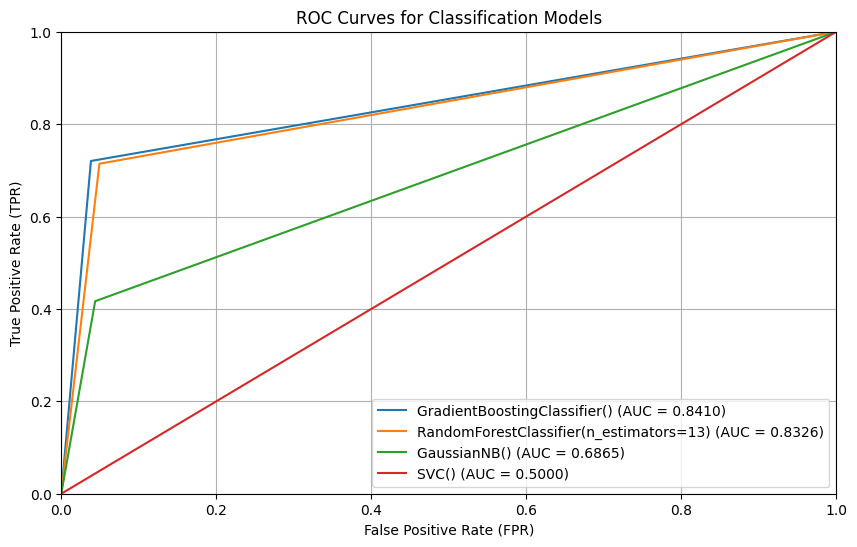

In [16]:
from sklearn.metrics import roc_curve, auc
models = [gbc,rfc,gnb,svc]
# Plot ROC curves for each model
ss.transform(X_test)
plt.figure(figsize=(10, 6))
for model in models:
    name=model
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    # checking sd to verify 
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

plt.title('ROC Curves for Classification Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.show()

### Conclusion Gradient Boost works well 